# Realizar todos los ejercicios en este notebook

In [1]:
%matplotlib inline

import numpy as np
import cv2
import pandas as pd
import matplotlib.pyplot as plt

import matplotlib
matplotlib.rcParams['figure.figsize'] = 5, 5


## Carga de datos

1. Cargar el csv **iris.csv** con pandas (Ayuda: `pd.read_csv`).
2. Cuantas filas y columnas tengo.
3. Existen valores nulos en mis datos? Si existen eliminar la fila (Ayuda: `dropna()`).
4. Cuantas filas me quedan luego de limpiar el dataset.
5. Un investigador del laboratorio tiene la hipotesis de que hubo un error en los datos y las columnas **sepal_length** y **petal_length** tienen los mismos valores. Como podemos checkear esto? (Ayuda: usar `all()`).

In [2]:
# 1. Cargar el csv
iris_data = pd.read_csv('csv/iris.csv')
iris_data

,sepal_length,sepal_width,petal_length,petal_width,name
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
5,5.4,3.9,1.7,0.4,Iris-setosa
6,4.6,3.4,1.4,0.3,Iris-setosa
7,5.0,3.4,1.5,0.2,Iris-setosa
8,4.4,2.9,1.4,0.2,Iris-setosa
9,4.9,3.1,1.5,0.1,Iris-setosa


In [3]:
# 2. Cuantas filas y columnas tengo.
print(iris_data.shape)

(150, 5)


In [4]:
# 3. Existen valores nulos en mis datos? Si existen eliminar la fila (Ayuda: isnull().values.any()).
print('Tengo valores nulos?:', iris_data.isnull().values.any())
print('\nEn que columnas tengo valores nulos?\n', iris_data.isnull().any())

# Eliminar fila con valores nulos
iris_data = iris_data.dropna()


Tengo valores nulos?: True

En que columnas tengo valores nulos?
 sepal_length    False
sepal_width     False
petal_length    False
petal_width     False
name             True
dtype: bool


In [5]:
# 4. Cuantas filas me quedan luego de limpiar el dataset?
print(iris_data.shape)

(146, 5)


In [6]:
# 5. Un investigador del laboratorio tiene la hipotesis de que hubo un error 
#    en los datos y las columnas sepal_length y petal_length tienen los mismos valores. 
#    Como podemos checkear esto?
(iris_data['sepal_length'] == iris_data['petal_length']).all()

False

## Analisis de variables

1. Haga un grafico de dispersion comparando **petal_length** y **petal_width**. Colorear cada punto de acuerdo a la especie, osea: **Iris-setosa**, **Iris-versicolor** o **Iris-virginica**. (Ayuda: `plot(kind='scatter', x=col1, y=col2, c=class, colormap='viridis')`. Recuerde que class debe ser numerico!).
2. Idem anterior pero comparando **sepal_length** y **sepal_width**.
3. Analice con boxplot cada columna del csv: **petal_length**, **petal_width**, **sepal_length** por especie y **sepal_width**. Existen outliers? (Ayuda: `boxplot(col, by=class)`).
4. Si existen outliers, segun lo visto en el teorico, como podemos filtrarlos, proponga un metodo. (Opcional) Implemente el metodo.
5. Prepare un histograma que muestre la cantidad datos para cada especie, nuestros datos estan balanceados? (Ayuda: `plot(kind='hist')`. Recuerde convertir los datos a algo numerico: `replace([c1, c2, c3], [v1, v2, v3])`).
6. Elija un metodo para escalar los datos, analice y describa el resultado.

Tenemos las siguientes clases: "Iris-setosa", "Iris-versicolor", "Iris-virginica", 
las reemplazaremos por [0, 1, 2] para el scatter plot


[Text(0, 0.5, 'petal_width'), Text(0.5, 0, 'petal_length')]

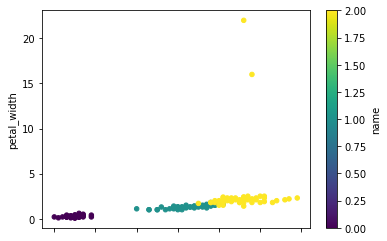

In [7]:
# 1. Haga un grafico de dispersion comparando petal_length y petal_width. 
#    Colorear cada punto de acuerdo a la especie, osea: Iris-setosa, Iris-versicolor o Iris-virginica
unique_names = iris_data['name'].unique()
print('Tenemos las siguientes clases: "Iris-setosa", "Iris-versicolor", "Iris-virginica", \n'
      'las reemplazaremos por [0, 1, 2] para el scatter plot')
iris_data2 = iris_data.replace(["Iris-setosa", "Iris-versicolor", "Iris-virginica"], 
                               [0, 1, 2])

ax = iris_data2.plot(kind='scatter', x='petal_length', y='petal_width',
                     c='name', colormap='viridis')
ax.set(xlabel='petal_length', ylabel='petal_width')


[Text(0, 0.5, 'sepal_width'), Text(0.5, 0, 'sepal_length')]

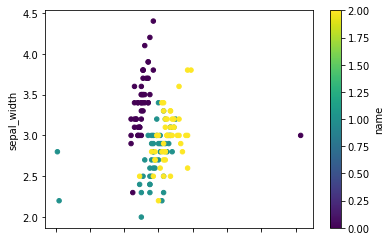

In [8]:
# 2. Idem anterior pero comparando sepal_length y sepal_width
ax = iris_data2.plot(kind='scatter', x='sepal_length', y='sepal_width',
                     c='name', colormap='viridis')
ax.set(xlabel='sepal_length', ylabel='sepal_width')


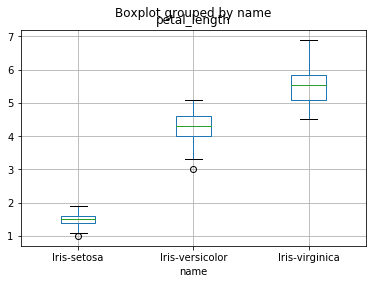

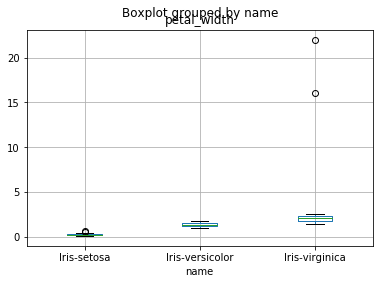

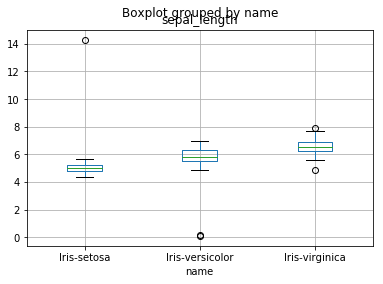

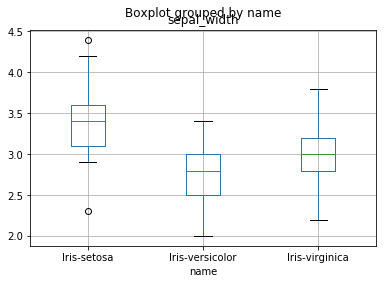

In [9]:
# 3. Analice con boxplot cada columna del csv: petal_length, petal_width, 
#    sepal_length por especie y sepal_width. Existen outliers?
iris_data.boxplot('petal_length', by='name')
iris_data.boxplot('petal_width', by='name')
iris_data.boxplot('sepal_length', by='name')
iris_data.boxplot('sepal_width', by='name')

# Datos antes de filtrar:  (146, 5)
# Datos despues de filtrar:  (142, 5)


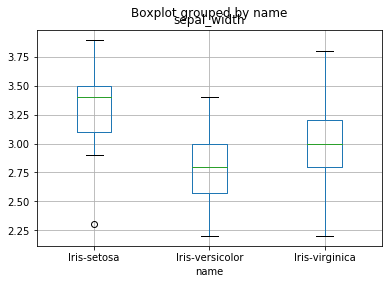

In [10]:
# 4. Si existen outliers, segun lo visto en el teorico, como podemos filtrarlos, proponga un metodo.
#    (Opcional) Implemente el metodo

# Usemos los rangos intercuartiles para filtrar outliers en sepal_width
Q1 = iris_data['sepal_width'].quantile(0.25)
Q3 = iris_data['sepal_width'].quantile(0.75)
IQR = Q3 - Q1
iqr_filter = (iris_data['sepal_width'] < (Q1 - 1.5 * IQR)) | ((iris_data['sepal_width'] > (Q3 + 1.5 * IQR)))

print('# Datos antes de filtrar: ', iris_data.shape)
iris_data = iris_data[~iqr_filter]
print('# Datos despues de filtrar: ', iris_data.shape)

# Veamos el nuevo boxplot de sepal_width
iris_data.boxplot('sepal_width', by='name')


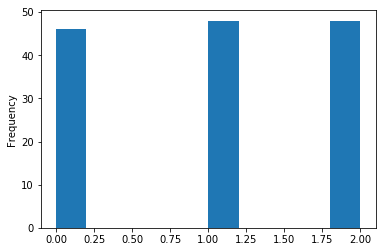

In [11]:
# 5. Prepare un histograma que muestre la cantidad datos para cada especie, 
#    nuestros datos estan balanceados?
iris_data2 = iris_data.replace(["Iris-setosa", "Iris-versicolor", "Iris-virginica"], 
                               [0, 1, 2])
iris_data2['name'].plot(kind='hist')

/home/pablo/.virtualenvs/py3/lib/python3.6/site-packages/sklearn/preprocessing/data.py:180: UserWarning: Numerical issues were encountered when centering the data and might not be solved. Dataset may contain too large values. You may need to prescale your features.
  warnings.warn("Numerical issues were encountered "
/home/pablo/.virtualenvs/py3/lib/python3.6/site-packages/sklearn/preprocessing/data.py:197: UserWarning: Numerical issues were encountered when scaling the data and might not be solved. The standard deviation of the data is probably very close to 0. 
  warnings.warn("Numerical issues were encountered "
/home/pablo/.virtualenvs/py3/lib/python3.6/site-packages/ipykernel_launcher.py:20: DataConversionWarning: Data with input dtype float32 were all converted to float64 by the scale function.


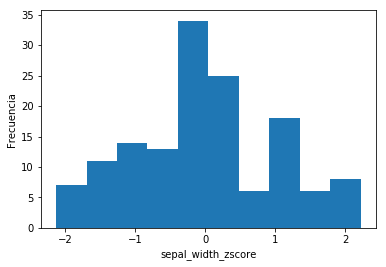

In [12]:
# 6. Elija un metodo para escalar los datos, analice y describa el resultado

# Scala con ZScore
from sklearn.preprocessing import scale

# Vamos a ver como ejemplo escalar sepal_width
sepal_width_scaled = scale(iris_data['sepal_width'].values.reshape(-1, 1).astype(np.float32),
                           axis=0, with_mean=True, with_std=True)
iris_data['sepal_width_zscore'] = sepal_width_scaled[:, 0]

# Analicemos las frecuencias
ax = iris_data['sepal_width_zscore'].plot(kind='hist')
ax.set(xlabel='sepal_width_zscore', ylabel='Frecuencia')

# Veamos como escalar todo el dataframe
# Seleccionamos las columnas 'sepal_length', 'sepal_width', 'petal_length', 'petal_width' para escalar
iris_subset = iris_data[['sepal_length', 'sepal_width', 'petal_length', 'petal_width']]
# Aplicamos ZScore
iris_scaled = scale(iris_subset.astype(np.float32),
                    axis=0, with_mean=True, with_std=True)


## Analisis de imagen

1. Elija y cargue dos imagenes a color, muestre las imagenes y sus histogramas.
2. Compare ambos histogramas y saque conclusiones sobre lo que observa. (Ayuda: `cv2.calcHist` y `matplotlib.pyplot.plot(hist)`).
3. Escale las imagenes usando **ZScore**, debe escalar cada canal por separado. Luego muestre el histograma obtenido y comparelo con el histograma de la imagen original. (Ayuda: `sklearn.preprocessing.scale` y `matplotlib.pyplot.plot(hist)`).

In [13]:
# 1. Elija y cargue dos imagenes a color, muestre las imagenes y sus histogramas
def plot_3d_hist(img, hist_size=[256], ranges=[0, 256]):
    # Preparamos el plot
    colors = ("b", "g", "r")
    plt.figure()
    plt.title("Histograma con canales de color")
    plt.xlabel("Intesidad de Pixel")
    plt.ylabel("# of Pixels")

    # Iteramos sobre los canales
    channels = cv2.split(img)
    for i in range(3):
        chan = channels[i]
        color = colors[i]
        # Creamos un histograma para el canal actual
        hist = cv2.calcHist([chan], [0], None, hist_size, ranges)

        # plot
        plt.plot(hist, color=color)
        plt.xlim(ranges)
        
# Cargamos las imagenes
orange = cv2.imread('images/orange.jpg')
apple = cv2.imread('images/apple.jpg')

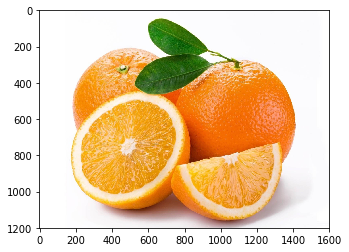

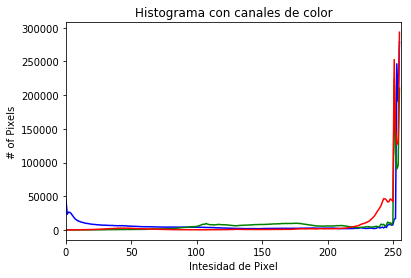

In [14]:
# Primer imagen y su histograma 
plt.imshow(cv2.cvtColor(orange, cv2.COLOR_BGR2RGB))
plot_3d_hist(orange)

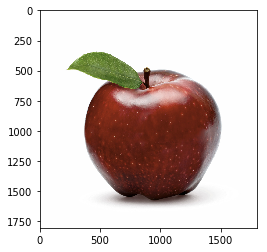

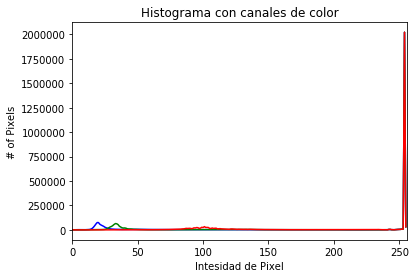

In [15]:
# Segunda imagen y su histograma
plt.imshow(cv2.cvtColor(apple, cv2.COLOR_BGR2RGB))
plot_3d_hist(apple)

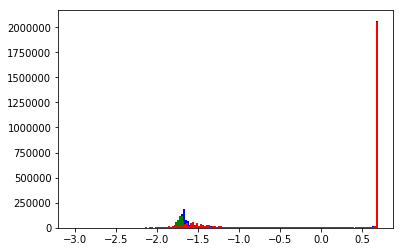

In [16]:
# 3. Escale las imagenes usando ZScore, debe escalar cada canal por separado. 
#    Luego muestre el histograma obtenido y comparelo con el histograma de la imagen original

# Lo haremos para una imagen
# Iteramos por cada canal (tenemos 3)
# Cast a float32, recordemos que este array es de tipo uint8
apple_copy = apple.astype(np.float32)  
for idx in range(3):
    channel = apple_copy[:, :, idx]  # Tomamos un canal
    mean = channel.mean()
    std = channel.std()
    
    # Sobreescribimos el canal con los nuevos valores
    apple_copy[:, :, idx] = (channel - mean) / std

_ = plt.hist(apple_copy[..., 0].ravel(), bins='auto', color='b')
_ = plt.hist(apple_copy[..., 1].ravel(), bins='auto', color='g')
_ = plt.hist(apple_copy[..., 2].ravel(), bins='auto', color='r')